# Lecture 9: Polynomial Interpolation

<div style='background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;'><strong>Note.</strong>  These notes are mainly a record of what we discussed and are not a substitute for attending the lectures and reading books! If anything is unclear/wrong, let me know and I will update the notes.
 </div> 

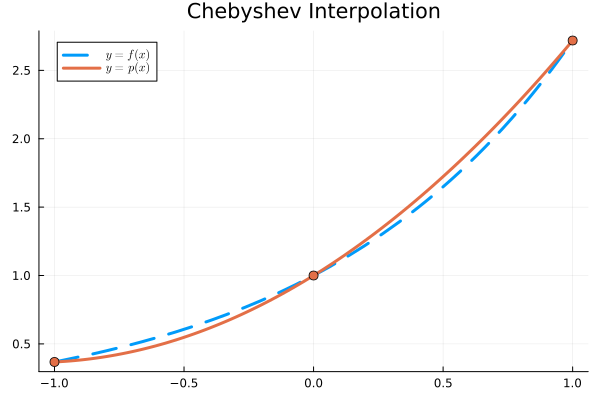

In [8]:
using Plots
using LaTeXStrings
using Polynomials

function f₁( x )
    return x + rand()
end

function f₂( x )
    return 1/( 1 + exp( x ) );
end

function f₃( x, α = 25 )
    return 1/( 1 + α*x^2 );
end

f₄ = t -> max(0, @. 1-abs(t) )


x = [-1,0,1]
y = @. exp( x )

    p = fit(ChebyshevT, x, y)

    plt1 = plot(x-> exp(x), -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, title = "Chebyshev Interpolation")
    plot!(plt1, p, -1, 1, label=L"y = p(x)", lw = 3 )
    scatter!(plt1, [x], [y], primary = false, markersize = 5)

## Previously.....

### Lagrange Interpolation Problem:

Suppose that $X = \{ x_0 < \cdots < x_n \}$ is a set of distinct *interpolation nodes*. 

***Aim***: find $p$ such that $p(x_j) = f_j$ for all $j = 0, \dots, n$. 

* $f_j$ - data points, 
* $f_j = f(x_j)$

<div class='alert alert-block alert-info'><b>Theorem (Lagrange Interpolation)</b> 

For $x_0 < \cdots < x_n$ (*nodes*) and a function $f$ defined on $X = \{x_0,\dots,x_n\}$, there exists a unique polynomial *interpolant* $I_Xf$ of degree at most $n$ such that $I_Xf(x_j) = f(x_j)$ for all $j=0,\dots,n$. 

</div> 

In the following, we will write $\mathcal P_n := \{p(x) = \sum_{j=0}^n a_j x^j \colon a_0, \dots,a_n \in \mathbb R\}$ for the set of polynomials of degree at most $n$.

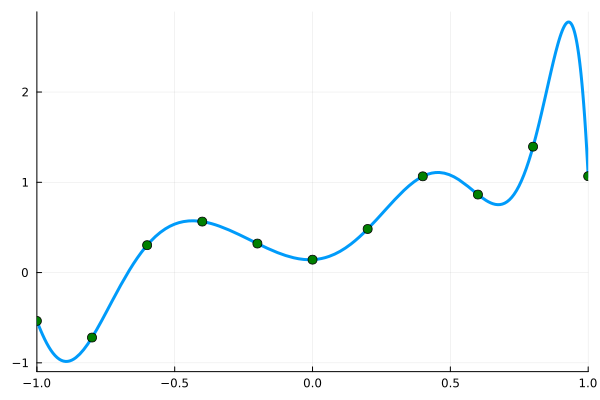

In [2]:
N = 10
X = range( -1, 1, N+1)
Y = f₁.(X)

p = fit( X, Y )

xx = -1:.05:1
plot( p, xlims=(-1,1), legend = false, lw = 3)
scatter!( X, Y, 
    primary = false, markersize = 5, color="green")



<div style='background-color: #ddff99; padding: 10px; border: 5px solid #009933;'><strong>Theorem.</strong>  

Suppose $f:[a,b]\to\mathbb R$ is $n+1$ times continuously differentiable and $X = \{x_0 < \dots < x_n\}$. Then, for all $x \in [a,b]$ there exists $\xi_x \in [\min \{x,x_0\} , \max \{x,x_n\}]$ such that 

\begin{align}
    f(x) - I_Xf(x) = \frac{f^{(n+1)}(\xi_x)}{(n+1)!} (x - x_0)(x-x_1) \cdots (x-x_n)
\end{align}

In particular, we have 

\begin{align}
    \left\| f - I_Xf \right\|_{L^\infty([a,b])} \leq \|f^{(n+1)}\|_{L^\infty([a,b])} \frac{\|\ell_X(x)\|_{L^\infty([a,b])}}{(n+1)!}  
\end{align}

where $\ell_X(x) := (x-x_0)(x-x_1)\cdots (x-x_n)$ is the *node polynomial* and $\| f \|_{L^\infty([a,b])} := \max_{x\in[a,b]} |f(x)|$.

</div> 

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff; border-right:50px'><strong>Remark.</strong>   

Compare with Taylor remainder

</div> 

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

Find the polynomial interpolation of $e^{-x}$ on $\{-1, 0, 1\}$.

</div> 

For $x \in [-1,1]$, we have 
\begin{align}
    |\ell_X(x)| &\leq \frac{e}{2\sqrt{n}} \left( \frac2e \right)^n
    &\text{for Equispaced nodes }  X = \Big\{ \frac{2j-n}{n} \Big\}_{j=0}^n \\
    |\ell_X(x)| &\leq 2^{1-n}
    &\text{for Chebyshev nodes } X = \Big\{ \cos \frac{j\pi}{n} \Big\}_{j=0}^n
\end{align}

## Equispaced Nodes

[ Info: Saved animation to c:\Users\math5\Math 5485\Pictures\Runge.gif


Plots.AnimatedGif("c:\\Users\\math5\\Math 5485\\Pictures\\Runge.gif")
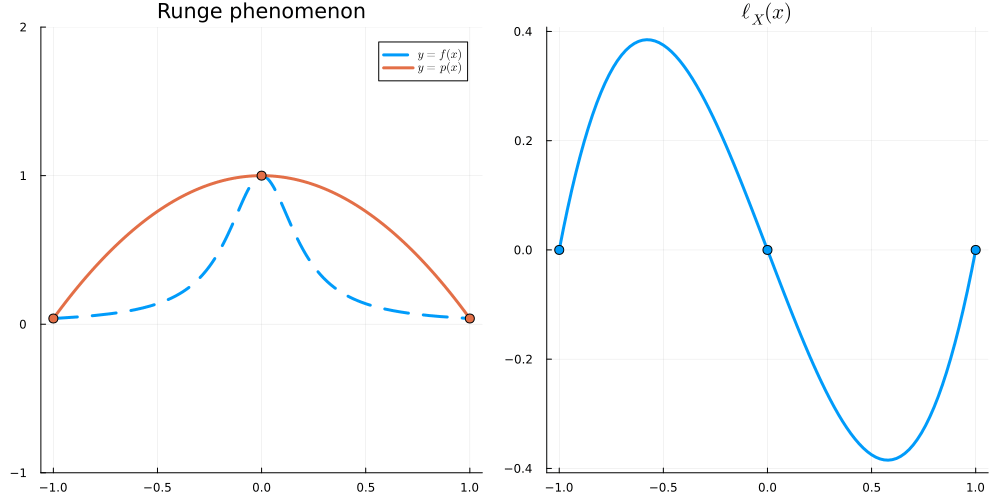

In [3]:
N = 20;

anim = @animate for n ∈ 2:N
    x = collect( @. ( 2*(0:1:n) - n )/n )
    y = @. f₃( x )

    p = fit(ChebyshevT, x, y)

    plt1 = plot(f₃, -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, title = "Runge phenomenon")
    plot!(plt1, p, -1, 1, label=L"y = p(x)", lw = 3 )
    scatter!(plt1, [x], [y], primary = false, ylims=(-1,2), markersize = 5)

    ℓ = fromroots( x )
    plt2 = plot(ℓ, -1, 1, title=L"\ell_X(x)", legend = false, lw = 3)
    scatter!(plt2, [x], [zeros(n)], primary = false, markersize = 5)

    plot( plt1, plt2, size=(1000, 500))

end

gif(anim, "Pictures/Runge.gif", fps = 1)

## Chebyshev Nodes

[ Info: Saved animation to c:\Users\math5\Math 5485\Pictures\Chebyshev.gif


Plots.AnimatedGif("c:\\Users\\math5\\Math 5485\\Pictures\\Chebyshev.gif")
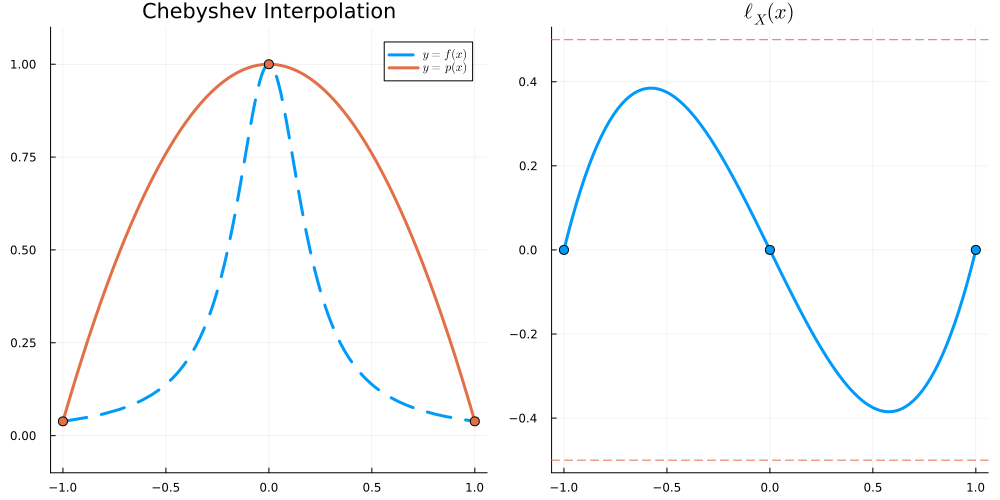

In [4]:
N = 25

err = zeros(N)
egrid = -1:.01:1

anim = @animate for n ∈ 2:N
    x = @. cos( π*(0:n)/n )
    y = @. f₃( x )

    p = fit(ChebyshevT, x, y)

    plt1 = plot(f₃, -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, title = "Chebyshev Interpolation")
    plot!(plt1, p, -1, 1, label=L"y = p(x)", lw = 3 )
    scatter!(plt1, [x], [y], primary = false, ylims=(-.1,1.1), markersize = 5)

    ℓ = fromroots( x )
    plt2 = plot(ℓ, -1, 1, title=L"\ell_X(x)", legend = false, lw = 3)
    scatter!(plt2, [x], [zeros(n)], primary = false, markersize = 5)

    hline!(plt2, [2.0^(1-n), -2.0^(1-n)], linestyle=:dash )

    plot( plt1, plt2, size=(1000, 500))

    err[n] = maximum( @. abs( p(egrid) - f₃(egrid) ) )

end

gif(anim, "Pictures/Chebyshev.gif", fps = 1)

## How to choose $X$ to minimise $\| \ell_X \|_{L^\infty([-1,1])}$?

In this section, we will write $\| f \|_{L^\infty} := \max_{x \in [-1,1]} |f(x)|$. 

Recall that 

\begin{align}
    \left\| f - I_Xf \right\|_{L^\infty} \leq \frac{\|f^{(n+1)}\|_{L^\infty}}{(n+1)!} \|\ell_X\|_{L^\infty}  
\end{align}

so it is natural to want to minimise 

\begin{align}
    \|\ell_X\|_{L^\infty} = \max_{x \in [-1,1]} |(x-x_0)(x-x_1)\dots(x-x_n)|
\end{align}

over all choices of $X = \{x_0,\dots,x_n\}$. Equivalently, we are minimising $\| p \|_{L^\infty}$ over all *monic* polynomials $p$ of degree $n+1$: that is, over all $p$ such that $p(x) = x^{n+1} + q(x)$ with $q\in \mathcal P_n$. We will show that scaled Chebyshev polynomials (of the first kind) solve this (so-called *Chebyshev*) problem.

### A Very Brief Introduction to Chebyshev Polynomials

For $x \in [-1,1]$ there exists $\theta \in [0,\pi]$ such that $x = \cos\theta$. We can therefore define $T_n$ on $[-1,1]$ by the condition that

\begin{align}
T_n( \cos \theta ) = \cos n\theta.
\end{align}

for $n = 0,1,2,...$.

We will use just some of the many interesting properties of $T_n$:

<div class='alert alert-block alert-info'><b>Theorem (Chebyshev Polynomials)</b> 

We have the following properties:

* $T_0(x) = 1$, and $T_1(x) = x$,
* $T_{n+1}(x) = 2x T_{n}(x) - T_{n-1}(x)$ for $n =1,2,\dots$,
* $T_n$ is thus a polynomial of degree $n$,
* The coefficent of $x^n$ in $T_n$ is $2^{n-1}$ for $n \geq 1$,
* $\|T_n\|_{L^\infty([-1,1])} = 1$ and $T_{n}\big( \cos\tfrac{j\pi}{n} \big) = (-1)^j$ for $j = 0,\dots,n$,
* $T_{n+1} = 0$ on $\big\{ \cos \frac{(2j+1)\pi}{2(n+1)} \big\}_{j=0}^{n}$.

</div> 

We define $X_{\mathrm{I}}$ to be the set of $n+1$ zeros of $T_{n+1}$ and $X_{\mathrm{II}}$ to be the set of $n+1$ extreme points of $T_n$.

\begin{align}
    X_{\mathrm I} &= \Big\{ \cos \frac{(2j+1)\pi}{2(n+1)} \Big\}_{j=0}^{n} \nonumber\\
    X_{\mathrm{II}} &= \big\{ \cos\tfrac{j\pi}{n} \big\}_{j=0}^n
\end{align}

$X_{\mathrm{I}}$ and $X_{\mathrm{II}}$ are the *Chebyshev nodes of the first and second kind*, respectively.

<div class='alert alert-block alert-success'><b>Proof.</b> 

Firstly, $T_0(\cos\theta) =\cos 0 = 1$ and so $T_0 = 1$. Moreover, $T_{1}(\cos \theta) = \cos\theta$ and so $T_1 = x$. 

Using the fact that $\cos(x+y) = \cos x \cos y - \sin x \sin y$ (which follows from e.g.~$e^{i(x+y)} = e^{ix} e^{iy}$), we find that 

\begin{align}
    T_{n\pm1}(\cos\theta) &= \cos( n\theta \pm \theta) \nonumber\\
    %
    &= \cos \theta \cos n\theta  \mp  \sin\theta \sin n\theta.
\end{align}

The sum of these equations is therefore $T_{n+1}(\cos\theta) + T_{n-1}(\cos\theta) = 2 \cos \theta \cos n\theta = 2 \cos(\theta) T_n(\cos\theta)$ and thus the recursion relation follows.

One can therefore show inductively that $T_n$ is a polynomial of degree $n$. Using the recursion, the coeficient of $x^{n+1}$ in $T_{n+1}$ is $2$ times the coefficient of $x^n$ in $T_{n}$. You can therefore argue inductively that the coeficient of $x^n$ in $T_{n}$ is $2^{n-1}$.

We have $|T_n(\cos\theta)| = |\cos n\theta| \leq 1$ and this maximum is achieved when $n\theta = j\pi$ for some $j \in \mathbb Z$. Restricting this to $\theta = \frac{j\pi}{n} \in [0,\pi]$ gives $j = 0,\dots,n$. At these values, we have $T_n( \cos\tfrac{j\pi}{n} ) = \cos j\pi = (-1)^j$.

$T_{n+1}$ is a polynomial of degree $n+1$ and thus has at most $n+1$ zeros in the interval $[-1,1]$. We have $T_{n+1}(\cos\theta) = \cos (n+1)\theta = 0$ when $(n+1)\theta = \frac{\pi}{2} + j \pi$ for $j \in \mathbb Z$ such that $\theta = \frac{ (2j+1) \pi }{ 2(n+1) } \in [0,\pi]$. That is, for $j = 0,\dots,n$.

</div> 

Here, we plot the first $5$ Chebyshev polynomials on $[-1,1]$ together with $(x, T_n(x))$ for $x \in X_{\mathrm{II}}$ with $n=5$

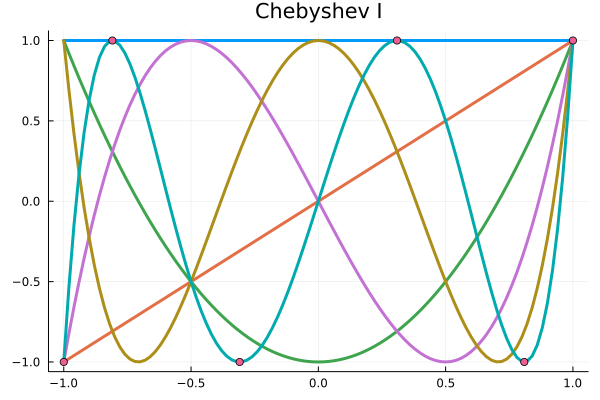

In [28]:
plot(ChebyshevT([1.]), -1, 1, title="Chebyshev I", legend = false, lw = 3)
plot!(ChebyshevT([0, 1]), -1, 1, title="Chebyshev I", legend = false, lw = 3)
plot!(ChebyshevT([0,0,1.]), -1, 1, title="Chebyshev I", legend = false, lw = 3)
plot!(ChebyshevT([0,0,0,1.]), -1, 1, title="Chebyshev I", legend = false, lw = 3)
plot!(ChebyshevT([0,0,0,0,1.]), -1, 1, title="Chebyshev I", legend = false, lw = 3)

p = ChebyshevT([0,0,0,0,0,1.])
plot!(p, -1, 1, title="Chebyshev I", legend = false, lw = 3)

scatter!( @. cos( pi*(0:5)/5 ), @. p( cos( pi* (0:5)/5 ) ) )

We define the *monic* (with leading coefficient equal to $1$) Chebyshev polynomials as $t_0(x) = 1$ and $t_n(x) := 2^{1-n} T_n(x)$ for $n \geq 1$. We are ready for the main result of this section ("Which nodes to choose?"):

<div class='alert alert-block alert-info'><b>Theorem.</b> 

The monic Chebyshev polynomials solve the Chebyshev problem (on $[-1,1]$). That is, 

\begin{align}
    \|t_{n+1} \|_{L^\infty([-1,1])} \leq \min_{p = x^{n+1} + q : \,\, q \in \mathcal P_n  } \big\| p \big\|_{L^\infty([-1,1])}.
\end{align}

</div> 

<div class='alert alert-block alert-success'><b>Proof.</b> 

Here, we just write $\|\,\cdot\,\|_{L^\infty}$ for $\|\,\cdot\,\|_{L^\infty([-1,1])}$.

Suppose that $p$ minimises the right hand side of (1). Then, because $t_{n+1}$ is a monic polynomial of degree $n+1$, we must have 

\begin{align*}
    \big\|p \big\| \leq \| t_{n+1} \|_{L^\infty} = 2^{1-(n+1)} \| T_{n+1} \|_{L^\infty} = 2^{-n}
\end{align*}

Define $r(x) = t_{n+1}(x) - p(x)$ and note that 

\begin{align}
    r( z_j ) = (-1)^j 2^{-n} - p( z_j ), \qquad \text{for } z_j := \cos \frac{j\pi}{n+1}
\end{align}

and $j = 0,1,\dots,n+1$ (here, we have used the fact that $z_j$ are the extreme values of $T_{n+1}$ for $j=0,\dots,n+1$). 

Therefore, since $|p(x)| \leq 2^{-n}$ for all $x \in [-1,1]$, we have

\begin{align}
    r( z_j ) &= 2^{-n} - p( z_j ) \geq 0 \qquad &\text{for even } j \\
    r( z_j ) &= (-1) 2^{-n} - p( z_j ) \leq 0 \qquad &\text{for odd } j.
\end{align}

By the change of sign theorem, there exists $x_1,\dots,x_{n+1}$ such that $z_j \leq x_{j+1} \leq z_{j+1}$ and $r(x_j) = 0$. As a result, $r$ is a polynomial of degree at most $n$ with $n+1$ zeros and thus $r = 0$ and $p = t_{n+1}$. 

</div> 

We have therefore shown that, choosing $X =X_{\mathrm{I}}=  \{ \text{zeros of }t_{n+1} \}$ minimises the node polynomial in the following sense

\begin{align}
    \min_{ y_0 < \dots < y_n } \| \ell_{Y} \|_{L^\infty([-1,1])} \geq \| \ell_X \|_{L^\infty([-1,1])} = 2^{-n}
\end{align} 

It turns out that $\ell_{X_{\mathrm{II}}}(x) = 2^{-n} \big( T_{n+1}(x) - T_{n-1}(x) \big)$ and so $\|\ell_{X_{\mathrm{II}}}\|_{L^\infty([-1,1])} \leq 2^{1-n}$ (here, we used $|T_{n}|\leq 1$) and so, in practice, one expects the same approximation rates when using $X = X_{\mathrm{II}} = \{\text{extreme points of } T_n \}$.  

## Barycentric formula for Chebyshev

Using the standard Lagrange formulation $p(x) = \sum_{j=0}^n \ell_j(x) f(x_j)$ is slow and unstable! Computing $\ell_j(x)$ for a single $x$ requires $O(n)$ operations and thus evaluating $p(x)$ requires $O(n^2)$. Moreover, due to subtractive cancellation, this method is unstable.

  5.944383 seconds (25.78 M allocations: 15.129 GiB, 22.59% gc time, 2.50% compilation time)


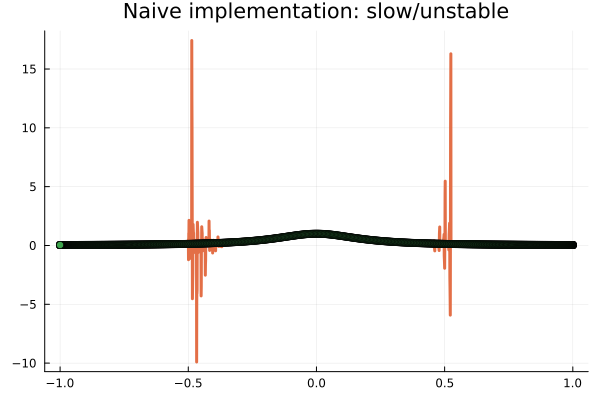

In [35]:
n = 1000

x = @. cos( π*(0:n)/n )
y = @. f₃( x )

function L( j, t ) 
    if j == 0
        return prod( @. t - x[2:end] ) / prod( @. x[1] - x[2:end] )
    elseif j == length(x)-1 
        return prod( @. t - x[1:end-1] ) / prod( @. x[end] - x[1:end-1] )
    else
        return prod( @. t - x[1:j] ) * prod( @. t - x[(j+2):end] ) / ( prod( @. x[j+1] - x[1:j] ) * prod( @. x[j+1] - x[(j+2):end] ) )
    end
end 

function p_naive( t ) 
    r = 0
    for j in 0:(length(x)-1)
        r = r + L(j, t ) * y[j+1] 
    end
    return r
end 

plot(f₃, -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, legend=false)
@time plot!( t -> p_naive( t ), -1, 1, title="Naive implementation: slow/unstable", lw = 3 )
scatter!( [x], [f₃.(x)])

Instead, we may use the Barycentric formula: First notice that 

\begin{align}
    \ell_j(x) = \prod_{k \not= j} \frac{x - x_k}{x_j - x_k} = \frac{\ell_X(x)}{x- x_j} \frac{1}{ \prod_{k \not= j} (x_j - x_k) }
\end{align}

Therefore on defining $\lambda_j := \left( \prod_{k \not= j} (x_j - x_k) \right)^{-1}$ and dividing by $\sum_{j=0}^n \ell_j(x) = 1$, we obtain

\begin{align}
    p(x) &= \left. \sum_{j=0}^n \ell_j(x) f(x_j) \middle/ \sum_{j=0}^n \ell_j(x) \right. \nonumber\\
    &= \left. \ell_X(x) \sum_{j=0}^n \frac{\lambda_j f(x_j)}{x - x_j} \middle/ \ell_X(x) \sum_{j=0}^n \frac{\lambda_j}{x - x_j} \right. \nonumber\\
    &= \left. \sum_{j=0}^n \frac{\lambda_j f(x_j)}{x - x_j} \middle/ \sum_{j=0}^n \frac{\lambda_j}{x - x_j} \right.
\end{align}

which is known as the Barycentric Formula. 

For a fixed interpolation set, one may compute $\lambda_j$ once and then evaluating $p(x)$ requires only $O(n)$ computations. 

In fact, for the Chebyshev nodes $X_{\mathrm{II}} = \big\{ \cos \frac{j\pi}{n} \big\}_{j=0}^n$, we have a simple formula for the $\lambda_j$:

\begin{align}
    \lambda_j = \begin{cases}
        \frac{2^{n}}{4n}  & \text{if } j = 0\nonumber\\
        (-1)^j \frac{2^{n}}{2n} & \text{if } j = 1,\dots,n-1 \nonumber\\
        (-1)^n \frac{2^{n}}{4n} & \text{if } j = n
    \end{cases}
\end{align}

Moreover, this formula has been proved to be numerically stable which we demonstrate in the following:

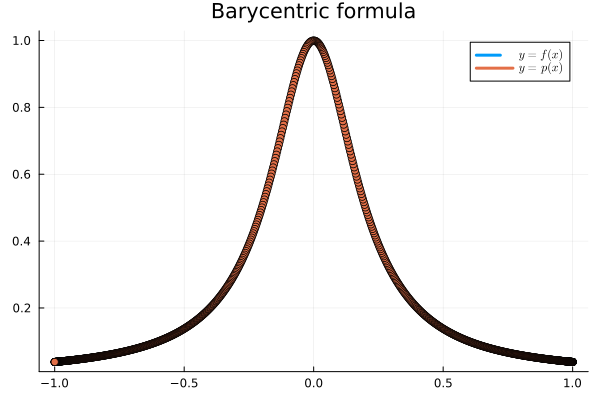

In [42]:
n = 1000
x = @. cos( π*(0:n)/n )
y = @. f₃( x )

λ = zeros(n+1)
λ[1] = 1/2
λ[n+1] = (-1)^n/2
for j in 1:(n-1)
    λ[j+1] = (-1)^j
end

function p_bary( t )
    return sum( @. λ * y / (t - x) ) / sum( @. λ / (t - x) )
end

plot(f₃, -1, 1, label=L"y = f(x)", lw = 3, linestyle = :dash, title = "Barycentric formula")
plot!(p_bary, -1, 1, label=L"y = p(x)", lw = 3 )
scatter!( [x], [f₃.(x)], primary = false)

## Newton Form & Divided Differences

Next time...